In [7]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt
from config import db_params  # Import the db_params from the external config module

try:
    conn = psycopg2.connect(
        **db_params
    )
    print("Connection established")
except Exception as error:
    print(error)

Connection established


    payment_date  amount
0     2023-01-01  632.10
1     2023-01-02       0
2     2023-01-03  350.00
3     2023-01-04       0
4     2023-01-05       0
..           ...     ...
360   2023-12-27  120.00
361   2023-12-28       0
362   2023-12-29       0
363   2023-12-30       0
364   2023-12-31  270.00

[365 rows x 2 columns]


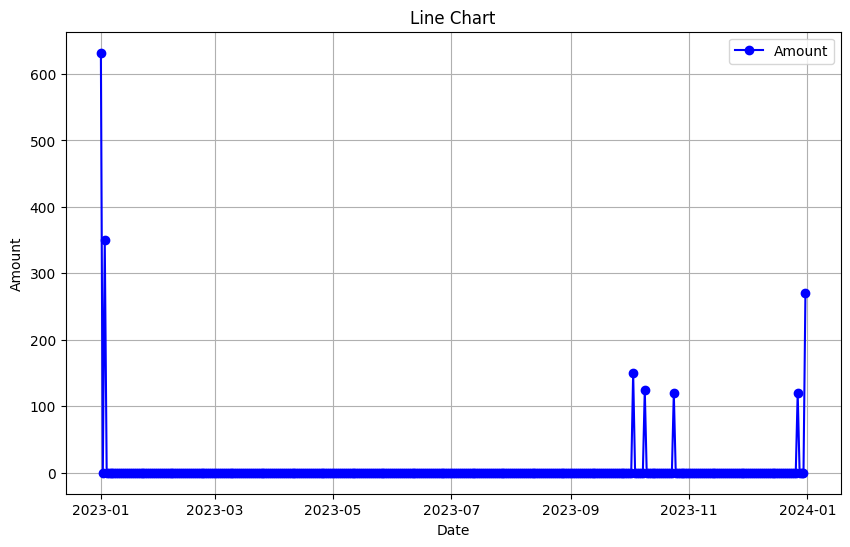

In [10]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
        **db_params
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Write a SQL query to retrieve the data
query = "SELECT payment_date, sum(amount) as amount FROM public_test.payments group by payment_date"

cursor.execute(query)
data = cursor.fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['payment_date', 'amount'])

# Convert the 'payment_date' column to datetime64[ns]
df['payment_date'] = pd.to_datetime(df['payment_date'])

# Sort the data by 'payment_date'
grouped_data = df.sort_values(by='payment_date')

# Create a date range that covers the desired time period
date_range = pd.date_range(start=grouped_data['payment_date'].min(), end=grouped_data['payment_date'].max(), freq='D')

# Create a DataFrame with the complete date range
complete_data = pd.DataFrame({'payment_date': date_range})

# Left-join your existing data to the complete date range and fill missing values with 0
merged_data = complete_data.merge(grouped_data, on='payment_date', how='left').fillna(0)

# Now, 'merged_data' contains all dates and the associated values with 0 for missing dates
print(merged_data)

plt.figure(figsize=(10, 6))
plt.plot(merged_data['payment_date'], merged_data['amount'], marker='o', linestyle='-', color='b', label='Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Line Chart')
plt.legend()
plt.grid()
plt.show()

# Close the database connection
conn.close()
